### Polynomial  Regression Implementation

In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import statsmodels.api as sm
from sklearn.pipeline import Pipeline

Text(0, 0.5, 'y dataset')

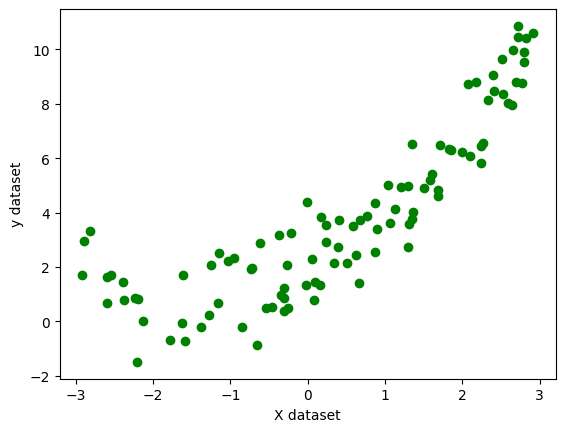

In [40]:
X = 6 * np.random.rand(100, 1) - 3
y = 0.5 * X**2 + 1.5*X + 2 + np.random.randn(100, 1)
plt.scatter(X, y, color = "green")
plt.xlabel("X dataset")
plt.ylabel("y dataset")

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [42]:
l_regression = LinearRegression()

In [43]:
l_regression.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [44]:
score = r2_score(y_test, l_regression.predict(X_test))
score

0.3550485133729513

Text(0, 0.5, 'Y')

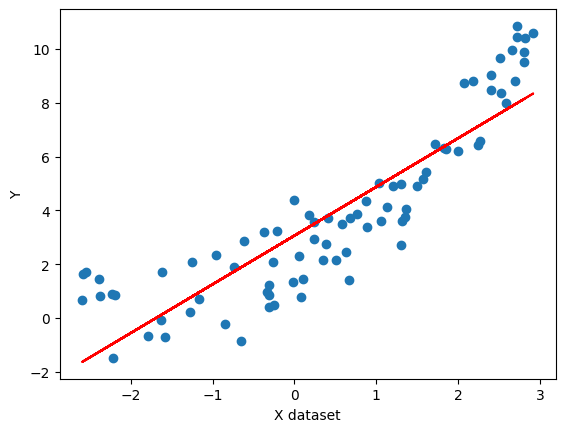

In [45]:
plt.plot(X_train, l_regression.predict(X_train), color = "red")
plt.scatter(X_train, y_train)
plt.xlabel("X dataset")
plt.ylabel("Y")

In [75]:
# Lets apply polynomial transformation
poly = PolynomialFeatures(degree = 4, include_bias = True)

In [76]:
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [77]:
X_train_poly

array([[ 1.00000000e+00, -3.06048170e-01,  9.36654824e-02,
        -2.86661495e-02,  8.77322260e-03],
       [ 1.00000000e+00,  8.50350561e-02,  7.23096077e-03,
         6.14885155e-04,  5.22867937e-05],
       [ 1.00000000e+00, -3.09601447e-01,  9.58530558e-02,
        -2.96762447e-02,  9.18780831e-03],
       [ 1.00000000e+00,  2.52449379e+00,  6.37306891e+00,
         1.60887729e+01,  4.06160073e+01],
       [ 1.00000000e+00, -2.53241764e-01,  6.41313911e-02,
        -1.62407466e-02,  4.11283533e-03],
       [ 1.00000000e+00, -3.77140351e-01,  1.42234844e-01,
        -5.36424991e-02,  2.02307510e-02],
       [ 1.00000000e+00,  1.29554425e+00,  1.67843491e+00,
         2.17448670e+00,  2.81714375e+00],
       [ 1.00000000e+00,  6.26545651e-01,  3.92559453e-01,
         2.45956418e-01,  1.54102924e-01],
       [ 1.00000000e+00,  1.71251939e+00,  2.93272265e+00,
         5.02234438e+00,  8.60086212e+00],
       [ 1.00000000e+00,  6.62697662e-01,  4.39168191e-01,
         2.91035733e-01

In [78]:
X_test_poly

array([[ 1.00000000e+00,  8.67500546e-01,  7.52557197e-01,
         6.52843779e-01,  5.66342334e-01],
       [ 1.00000000e+00,  1.68143193e+00,  2.82721335e+00,
         4.75376681e+00,  7.99313531e+00],
       [ 1.00000000e+00,  1.68784479e+00,  2.84882002e+00,
         4.80836603e+00,  8.11577553e+00],
       [ 1.00000000e+00,  2.09211491e+00,  4.37694480e+00,
         9.15707148e+00,  1.91576458e+01],
       [ 1.00000000e+00, -2.13298399e+00,  4.54962069e+00,
        -9.70426807e+00,  2.06990484e+01],
       [ 1.00000000e+00,  2.23967574e+00,  5.01614743e+00,
         1.12345437e+01,  2.51617351e+01],
       [ 1.00000000e+00, -7.18520431e-01,  5.16271610e-01,
        -3.70951699e-01,  2.66536375e-01],
       [ 1.00000000e+00, -5.35252504e-01,  2.86495243e-01,
        -1.53347297e-01,  8.20795245e-02],
       [ 1.00000000e+00,  2.63665652e+00,  6.95195759e+00,
         1.83299243e+01,  4.83297144e+01],
       [ 1.00000000e+00, -4.58907905e-01,  2.10596465e-01,
        -9.66443828e-02

In [79]:
# Include Bias parameter
regression = LinearRegression()

In [80]:
regression.fit(X_train_poly, y_train)
y_pred = regression.predict(X_test_poly)
score = r2_score(y_test, y_pred)

In [81]:
score

0.8228545034296747

In [82]:
regression.coef_

array([[ 0.        ,  1.5524831 ,  0.21177011, -0.00161898,  0.03564551]])

In [83]:
regression.intercept_

array([2.10735013])

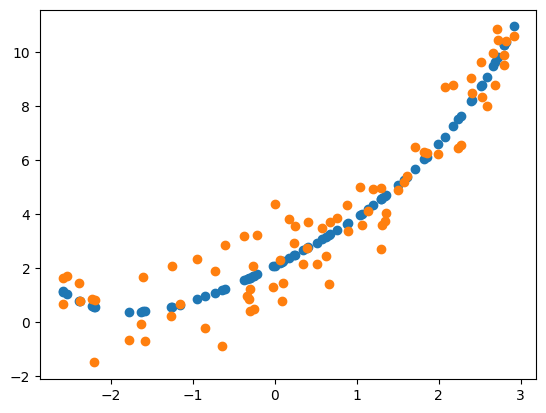

In [84]:
plt.scatter(X_train, regression.predict(X_train_poly))
plt.scatter(X_train, y_train)

In [85]:
# Prediction of new dataset
X_new = np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)

In [87]:
X_new_poly

array([[ 1.00000000e+00, -3.00000000e+00,  9.00000000e+00,
        -2.70000000e+01,  8.10000000e+01],
       [ 1.00000000e+00, -2.96984925e+00,  8.82000455e+00,
        -2.61940839e+01,  7.77924802e+01],
       [ 1.00000000e+00, -2.93969849e+00,  8.64182723e+00,
        -2.54043665e+01,  7.46811778e+01],
       [ 1.00000000e+00, -2.90954774e+00,  8.46546804e+00,
        -2.46306834e+01,  7.16641492e+01],
       [ 1.00000000e+00, -2.87939698e+00,  8.29092700e+00,
        -2.38728702e+01,  6.87394705e+01],
       [ 1.00000000e+00, -2.84924623e+00,  8.11820409e+00,
        -2.31307624e+01,  6.59052376e+01],
       [ 1.00000000e+00, -2.81909548e+00,  7.94729931e+00,
        -2.24041955e+01,  6.31595663e+01],
       [ 1.00000000e+00, -2.78894472e+00,  7.77821267e+00,
        -2.16930052e+01,  6.05005924e+01],
       [ 1.00000000e+00, -2.75879397e+00,  7.61094417e+00,
        -2.09970269e+01,  5.79264711e+01],
       [ 1.00000000e+00, -2.72864322e+00,  7.44549380e+00,
        -2.03160961e+01

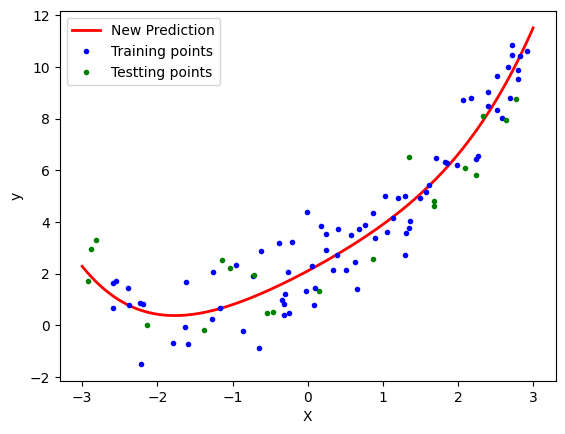

In [90]:
y_new = regression.predict(X_new_poly)
plt.plot(X_new, y_new, "r-", linewidth = 2, label = "New Prediction")
plt.plot(X_train, y_train, "b.", label = "Training points")
plt.plot(X_test, y_test, "g.", label = "Testting points")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

### Pipeline Concept

In [ ]:
def poly_regression(degree):
    X_new = np.linspace(-3, 3, 200).reshape(200, 1)
    
    poly_features=PolynomialFeatures(degree = degree, include_bias = True)
    lin_reg=LinearRegression()
    poly_regression=Pipeline([
        ("poly_features", poly_features),
        ("lin_reg", lin_reg)
    ])
    poly_regression.fit(X_train, y_train) ## ploynomial and fit of linear reression
    y_pred_new=poly_regression.predict(X_new)
    #plotting prediction line
    plt.plot(X_new, y_pred_new,'r', label="Degree " + str(degree), linewidth=2)
    plt.plot(X_train, y_train, "b.", linewidth=3)
    plt.plot(X_test, y_test, "g.", linewidth=3)
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.axis([-4,4, 0, 10]) #type: ignore
    plt.show()

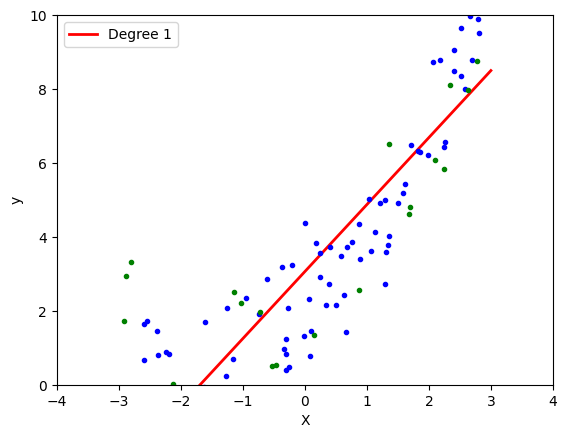

In [94]:
poly_regression(1)

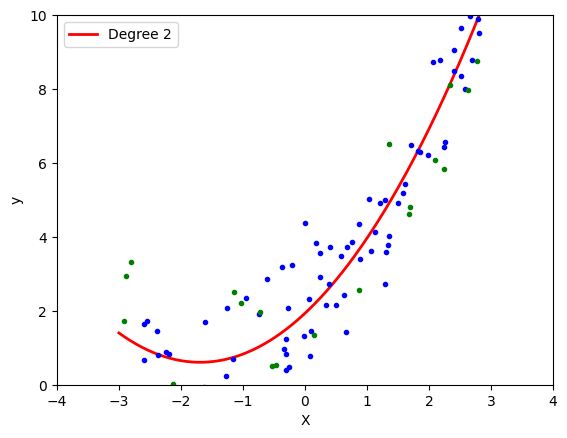

In [95]:
poly_regression(2)

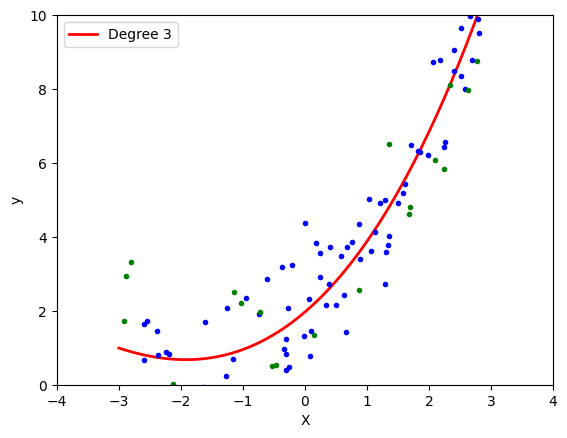

In [96]:
poly_regression(3)

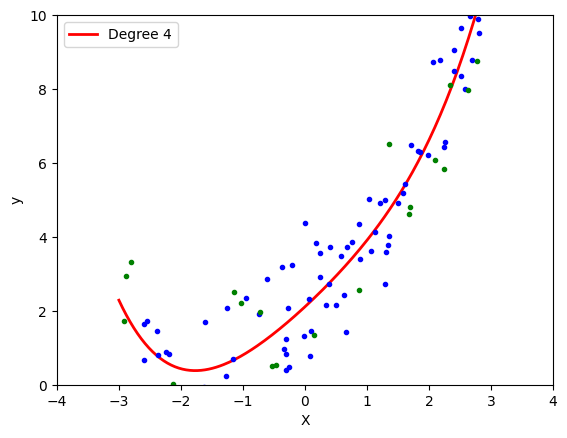

In [97]:
poly_regression(4)

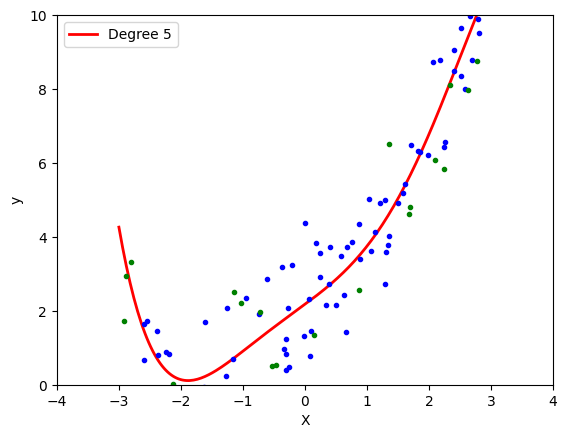

In [98]:
poly_regression(5)

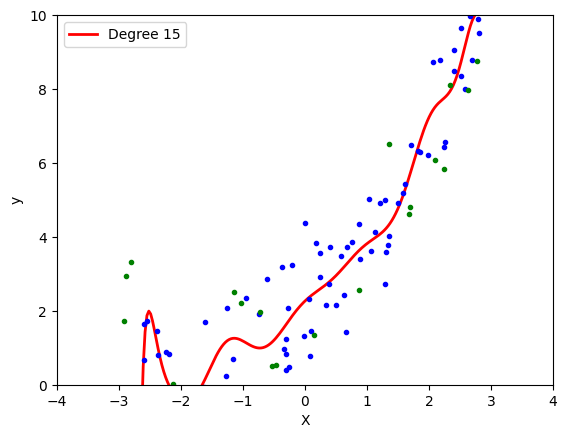

In [ ]:
poly_regression(15) # Overfitting